# <center> Statistical Analysis in Python


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.imputation import mice
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import StandardScaler

## Data and Codebook

1. polity: shows level of democracy 

2. colonial: Indicates whether a country was a former colony (1) or not (0), reflecting historical colonial status.

3. wdi_oilrent: Represents oil rents as a percentage of a country's GDP, showing the economic significance of oil production minus costs of production.

4. cw (Civil War): indicates the presence (1) or absence (0) of a civil war within a country during a specified time frame. It reflects internal conflict that might impact various socio-economic indicators.

5. al_ethnic2000: measures ethnic diversity or fractionalization in the year 2000, with higher values indicating greater ethnic diversity.

6. al_religion2000: Denotes religious diversity or fractionalization in the year 2000, with higher values indicating a more diverse religious landscape.

7. wdi_araland: Refers to arable land as a percentage of the land area, highlighting the proportion of land suitable for agriculture.

8. pop: Represents the population size, indicating the total number of people within a country or region.

9. gdp: Gross Domestic Product, measuring the total economic output of a country, indicative of its economic health and performance.

10. wdi_trade: Trade as a percentage of GDP, reflecting the importance of international trade (imports and exports) to the country's economy.

11. sfi:  a measure of state fragility index or other financial/social indicators depending on the dataset. Without further context, it's assumed to reflect aspects of a country's stability or institutional strength.

In [2]:
### Importing data from GitHub repository 

df= pd.read_csv("https://raw.githubusercontent.com/UnitForDataScience/RWorkshop/main/RWorkshop_data.csv")
df['log_pop'] = np.log(df['pop'])
df['log_gdp'] = np.log(df['gdp'])
df_2000 = df[df['year']==2000]

## Elementary Statistics 

In [3]:
### T-Test: Independent  

group0 = df_2000[df_2000['colonial'] == 0]['undp_hdi'].dropna()
group1 = df_2000[df_2000['colonial'] == 1]['undp_hdi'].dropna()


t_stat, p_value = stats.ttest_ind(group0, group1)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in 'undp_hdi' between the two colonial groups.")
else:
    print("There is no significant difference in 'undp_hdi' between the two colonial groups.")

T-statistic: 7.989597983077136
P-value: 2.008743571394181e-13
There is a significant difference in 'undp_hdi' between the two colonial groups.


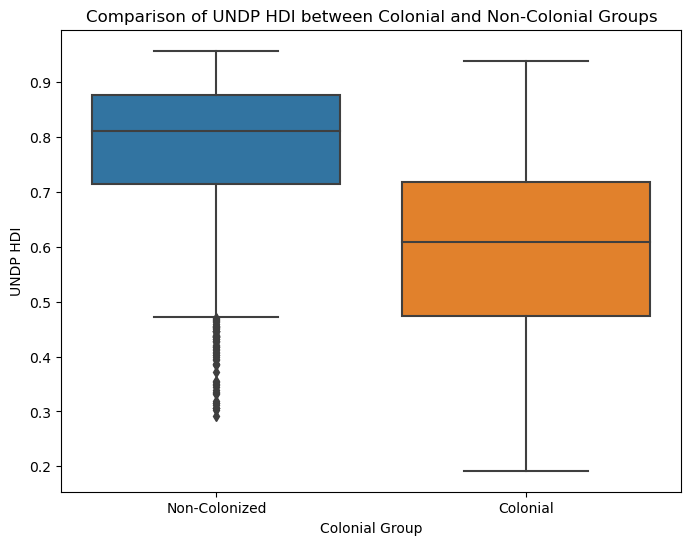

In [4]:
### box plot of two variables used in independent t-test 

plt.figure(figsize=(8, 6))
sns.boxplot(x='colonial', y='undp_hdi', data=df)
plt.title("Comparison of UNDP HDI between Colonial and Non-Colonial Groups")
plt.xlabel("Colonial Group")
plt.ylabel("UNDP HDI")
plt.xticks([0, 1], ['Non-Colonized', 'Colonial'])  
plt.show()

### T-Test: Paired 

In [5]:
### Seed for reproducibility

np.random.seed(42)
before_scores = np.random.normal(loc=60, scale=10, size=100)
after_scores = before_scores + np.random.normal(loc=10, scale=5, size=100)


df_scores = pd.DataFrame({
    'Before Teaching': before_scores,
    'After Teaching': after_scores
})


In [6]:
### Perform the paired t-test

t_stat, p_value = stats.ttest_rel(df_scores['Before Teaching'], df_scores['After Teaching'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

### Interpretation

if p_value < 0.05:
    print("There is a significant difference in scores before and after teaching.")
else:
    print("There is no significant difference in scores before and after teaching.")

T-statistic: -21.20551951212013
P-value: 1.3588465310961513e-38
There is a significant difference in scores before and after teaching.


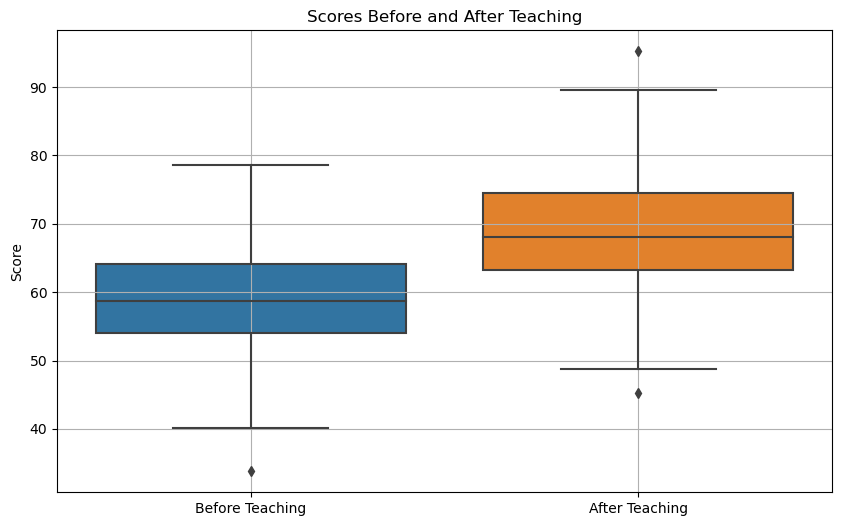

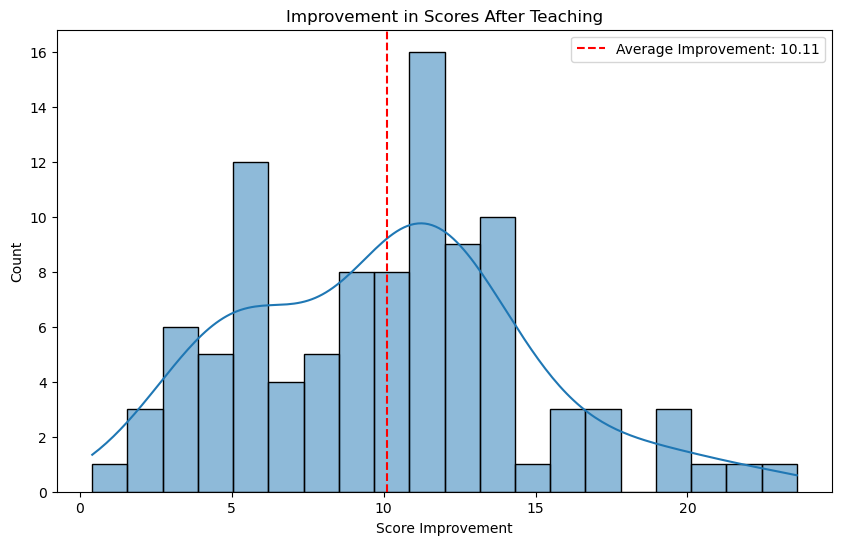

In [7]:
### Plotting the before and after scores

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_scores)
plt.title('Scores Before and After Teaching')
plt.ylabel('Score')
plt.grid(True)

### Plot distribution of improvements
plt.figure(figsize=(10, 6))
df_scores['Improvement'] = df_scores['After Teaching'] - df_scores['Before Teaching']
sns.histplot(df_scores['Improvement'], kde=True, bins=20)
plt.title('Improvement in Scores After Teaching')
plt.xlabel('Score Improvement')
plt.ylabel('Count')
plt.axvline(x=df_scores['Improvement'].mean(), color='r', linestyle='--', label=f"Average Improvement: {df_scores['Improvement'].mean():.2f}")
plt.legend()
plt.show()

### Anova

In [8]:
df_anova = df_2000[["undp_hdi", "democratic_performance_name"]]
df_anova= df_anova.dropna()


### Group values
groups = df_anova.groupby('democratic_performance_name')['undp_hdi'].apply(list)

### Perform one-way ANOVA
f_value, p_value = stats.f_oneway(*groups)

print("F-value:", f_value)
print("P-value:", p_value)

### Interpretation
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

F-value: 35.08914762539959
P-value: 1.618653079363611e-20
There is a significant difference between the groups.


In [9]:
### Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_anova['undp_hdi'],     
                          groups=df_anova['democratic_performance_name'],   
                          alpha=0.05)                        
print(tukey)

                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
            group1                         group2             meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------
          Authoritarian Regime      High performing democracy   0.3266    0.0  0.2354  0.4177   True
          Authoritarian Regime                  Hybrid Regime   0.0134 0.9971 -0.0957  0.1225  False
          Authoritarian Regime Mid-range performing democracy   0.1744    0.0  0.1009  0.2479   True
          Authoritarian Regime                 Weak democracy  -0.0177 0.9783 -0.1025  0.0671  False
     High performing democracy                  Hybrid Regime  -0.3132    0.0 -0.4365 -0.1898   True
     High performing democracy Mid-range performing democracy  -0.1522 0.0001 -0.2456 -0.0587   True
     High performing democracy                 Weak democracy  -0.3443    0.0 -0.4468 -0.24

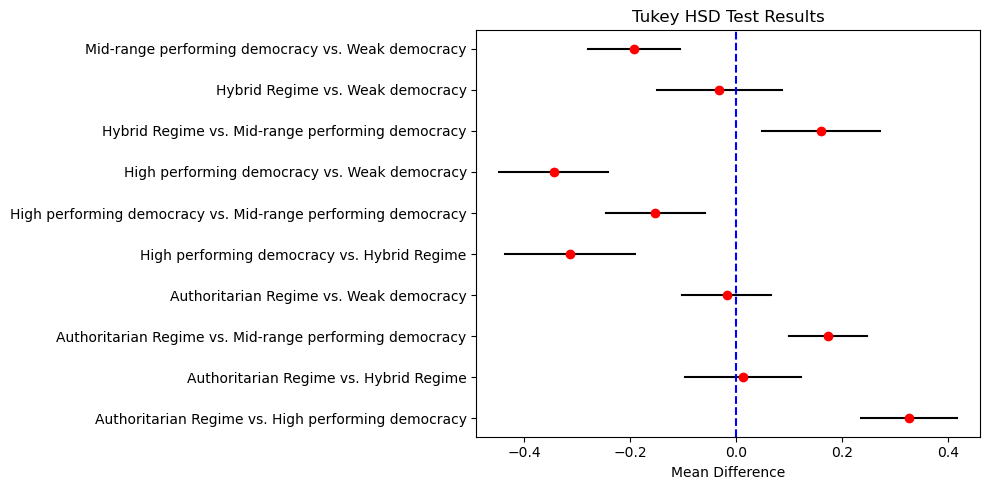

In [10]:
### Convert the Tukey HSD results to a DataFrame
tukey_results_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

### Plotting
fig, ax = plt.subplots(figsize=(10, 5))

### Plot each comparison
for i, row in tukey_results_df.iterrows():
    plt.plot([row['lower'], row['upper']], [i, i], color='black')  # Line for the confidence interval
    plt.plot(row['meandiff'], i, 'ro')  # Point for the mean difference

### Customizing the plot

plt.yticks(range(len(tukey_results_df)), [f"{row['group1']} vs. {row['group2']}" for index, row in tukey_results_df.iterrows()])
plt.axvline(x=0, color='blue', linestyle='--')  
plt.xlabel('Mean Difference')
plt.title('Tukey HSD Test Results')

plt.tight_layout()
plt.show()

### Correlations

In [11]:
### Let's look correlation among these variables 



### List of variables to subset and analyze
variables = [ 'wdi_oilrent', 'al_ethnic2000', 
    'al_religion2000', 'wdi_araland', 'log_pop', 'log_gdp', 
    'wdi_trade', 'sfi'
]

### Subset DataFrame to keep only specified variables
subset_df = df_2000[variables]

### Calculate the correlation matrix
correlation_matrix = subset_df.corr()

### Display the correlation matrix
print(correlation_matrix)

                 wdi_oilrent  al_ethnic2000  al_religion2000  wdi_araland  \
wdi_oilrent         1.000000       0.213985        -0.091154    -0.256733   
al_ethnic2000       0.213985       1.000000         0.137617    -0.228512   
al_religion2000    -0.091154       0.137617         1.000000    -0.003089   
wdi_araland        -0.256733      -0.228512        -0.003089     1.000000   
log_pop             0.056561       0.108426        -0.054008     0.280536   
log_gdp             0.071826      -0.401232        -0.081416    -0.031085   
wdi_trade           0.032123      -0.119246         0.072746    -0.098255   
sfi                 0.130302       0.536063         0.000029    -0.162568   

                  log_pop   log_gdp  wdi_trade       sfi  
wdi_oilrent      0.056561  0.071826   0.032123  0.130302  
al_ethnic2000    0.108426 -0.401232  -0.119246  0.536063  
al_religion2000 -0.054008 -0.081416   0.072746  0.000029  
wdi_araland      0.280536 -0.031085  -0.098255 -0.162568  
log_pop    

In [12]:
### Correlation between binary and continous variables 

cleaned_df = df_2000.dropna(subset=['colonial', 'undp_hdi'])


result = pointbiserialr(cleaned_df['colonial'], cleaned_df['undp_hdi'])

print(f"Point-Biserial Correlation Coefficient: {result.correlation}")
print(f"P-value: {result.pvalue}(0.000000000000000054981224350588857)")

Point-Biserial Correlation Coefficient: -0.5236028838506079
P-value: 2.0087435713940682e-13(0.000000000000000054981224350588857)


### OLS Regression 

Research Questions:
1. What factors are associated with democracy level/human development index? 

<Axes: xlabel='undp_hdi', ylabel='Count'>

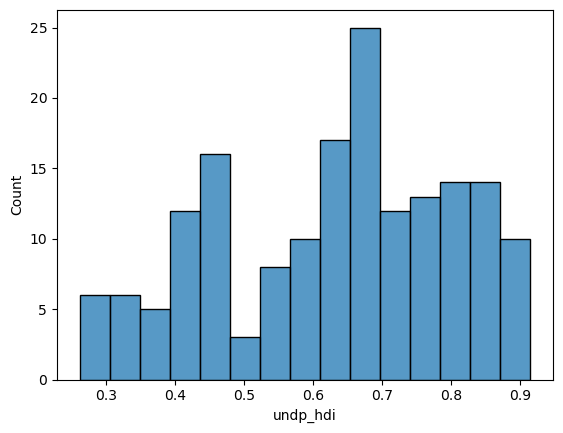

In [13]:
sns.histplot(x= "undp_hdi", data = df_2000, bins=15)

In [14]:
### Define the formula

formula = """undp_hdi~ colonial + wdi_oilrent + cw + al_ethnic2000+ al_religion2000 
+ wdi_araland + wdi_trade + log_gdp + log_pop"""

### Perform OLS regression
ols_model = smf.ols(formula=formula, data=df_2000).fit()

### Print the regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               undp_hdi   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     97.90
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.30e-56
Time:                        11:48:41   Log-Likelihood:                 206.64
No. Observations:                 153   AIC:                            -393.3
Df Residuals:                     143   BIC:                            -363.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0412      0.072     

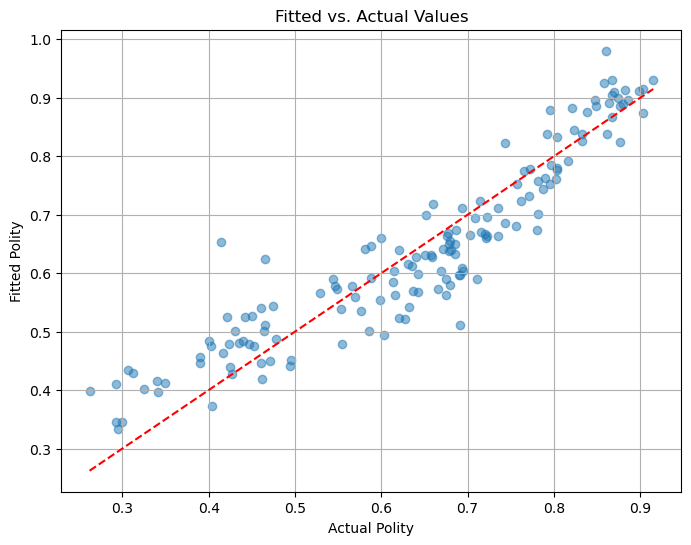

In [15]:
### Plot Fitted Values against Actual Values 


fitted_values = ols_model.fittedvalues

### Retrieve actual values directly from the model's dataset to ensure alignment
actual_values = ols_model.model.endog

### Plotting
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, fitted_values, alpha=0.5)
plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'r--') 
plt.xlabel('Actual Polity')
plt.ylabel('Fitted Polity')
plt.title('Fitted vs. Actual Values')
plt.grid(True)
plt.show()

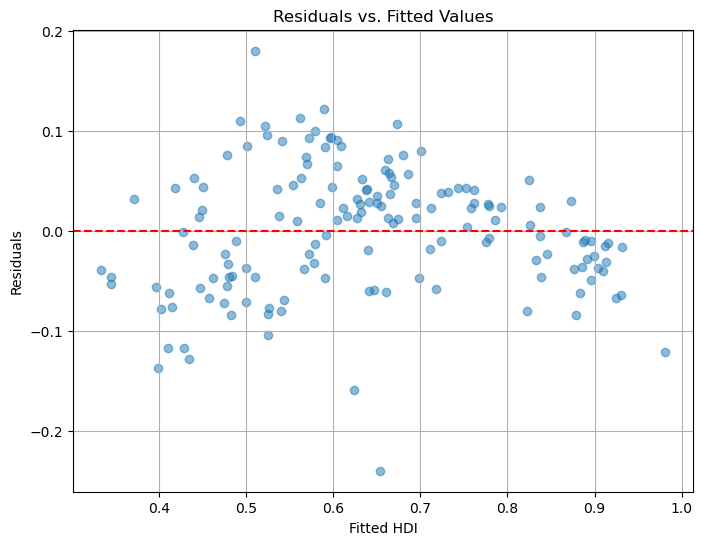

In [16]:
### Assumption 1: Check for Linearity 


### Residuals vs. Fitted Values Plot



###  Calculate the residuals
residuals = ols_model.resid

### Fitted values
fitted_values = ols_model.fittedvalues

### Plotting
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted HDI')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

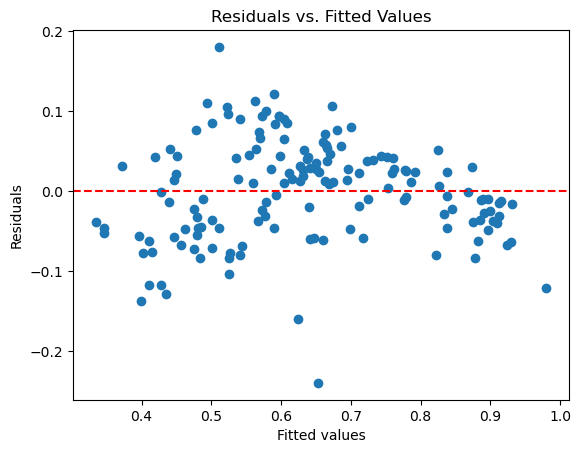

In [17]:
### Residuals vs. Fitted Values Plot

plt.scatter(ols_model.fittedvalues, ols_model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [18]:
### Assumption 2: Independence of Errors

### Durbin-Watson Test


dw_test_stat = durbin_watson(ols_model.resid)
print(f'Durbin-Watson statistic: {dw_test_stat}')

Durbin-Watson statistic: 1.9614428619329352


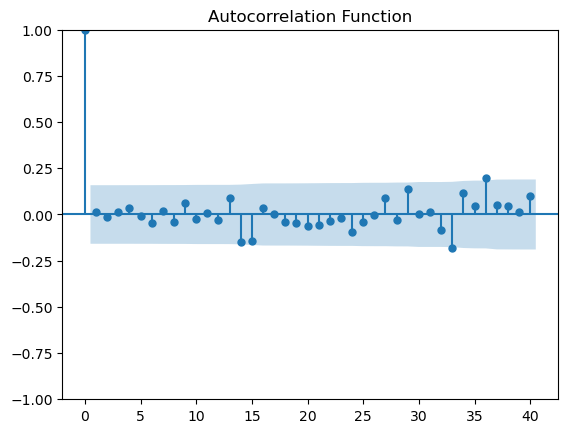

In [19]:
### Autocorrelation Function (ACF) Plot



### Plot the ACF of residuals

plot_acf(residuals, lags=40)  ### You can adjust the number of lags as necessary
plt.title('Autocorrelation Function')
plt.show()

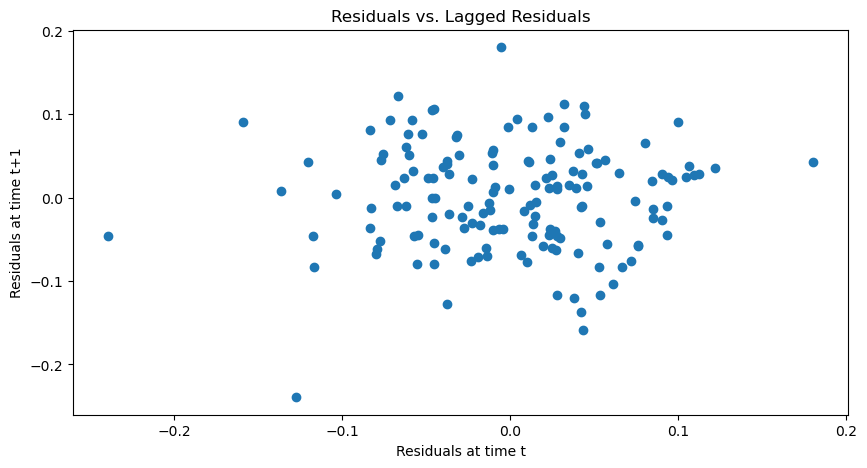

In [20]:
### Compute the residuals
residuals = ols_model.resid

### Plot residuals against lagged residuals to visualize autocorrelation
plt.figure(figsize=(10, 5))
plt.scatter(residuals[:-1], residuals[1:])
plt.title('Residuals vs. Lagged Residuals')
plt.xlabel('Residuals at time t')
plt.ylabel('Residuals at time t+1')
plt.show()

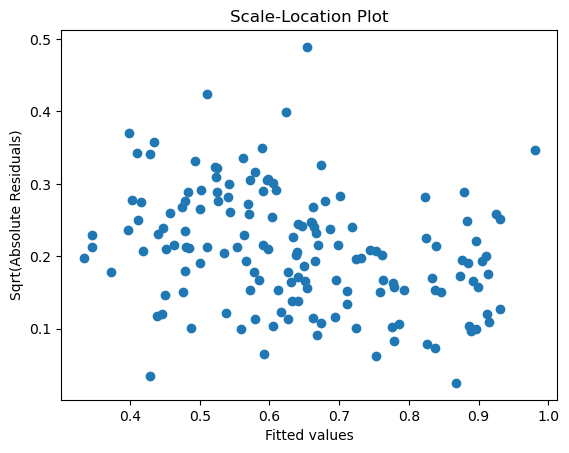

In [21]:
### Assumption 3: Homoscedasticity (Equal Variance of Errors)

### Scale-Location Plot
plt.scatter(ols_model.fittedvalues, np.sqrt(np.abs(ols_model.resid)))
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Absolute Residuals)')
plt.title('Scale-Location Plot')
plt.show()

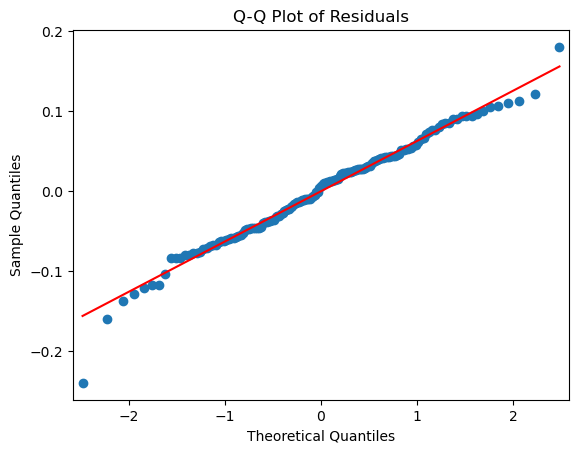

In [22]:
### Assumption 4: Normality of Errors


### Generate a Q-Q plot
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

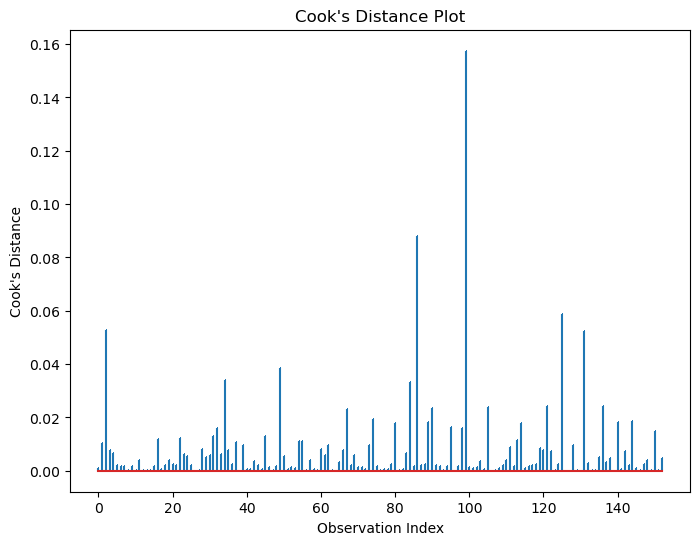

In [23]:
### Check Influential Points and Outliers 

### Cook's Distance Plot
influence = ols_model.get_influence()
(c, p) = influence.cooks_distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance Plot")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.show()

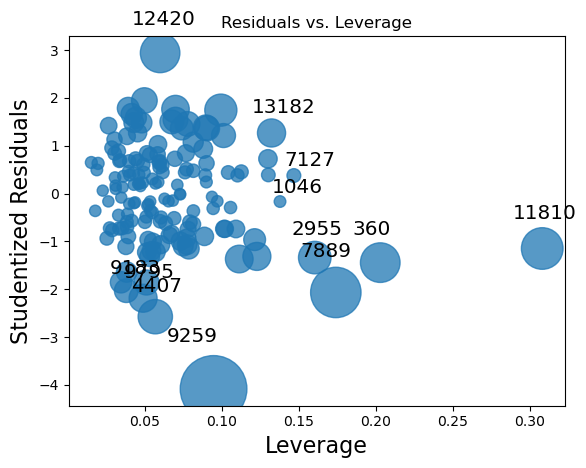

In [24]:
### Residuals vs. Leverage Plot

influence_plot(ols_model)
plt.title('Residuals vs. Leverage')
plt.show()

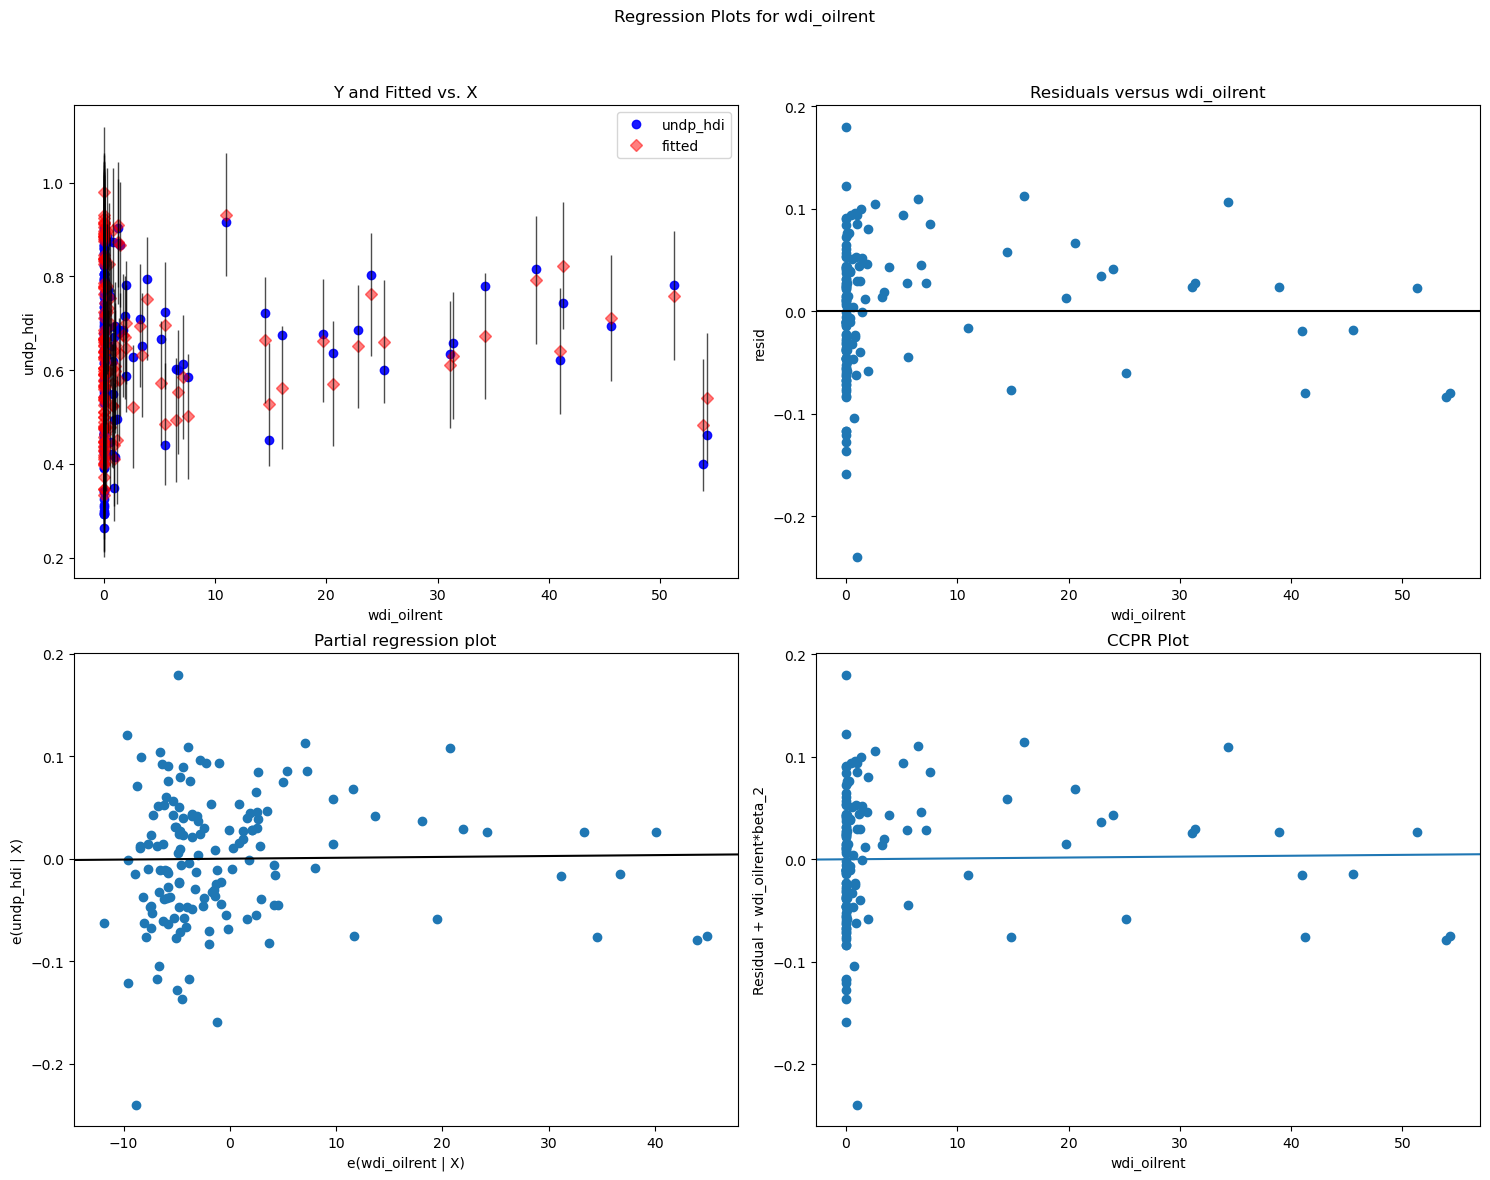

In [25]:
fig = plt.figure(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(ols_model, exog_idx='wdi_oilrent', fig=fig)
plt.show()

In [26]:
### We will now scale continous predictors 


### List of continuous variables you want to scale
continuous_variables = ['colonial', 'wdi_oilrent', "al_ethnic2000", 'al_religion2000', 
                        'wdi_araland', 'wdi_trade', 'log_gdp', 'log_pop']

### Keep binary and outcome variables aside (scaling only continous features)
binary_and_outcome = df_2000[['cw', 'vdem_libdem', "undp_hdi", "polity"]]

### Subset the continuous variables from df_2000 for scaling
X_continuous = df_2000[continuous_variables]

### Initialize scaler
scaler = StandardScaler()

### Fit scaler to continuous data and then transform it
X_continuous_scaled = scaler.fit_transform(X_continuous)

### Convert scaled continuous data back into a DataFrame
df_continuous_scaled = pd.DataFrame(X_continuous_scaled, columns=continuous_variables)

### Merge scaled continuous variables back with binary and outcome variables
df_scaled = pd.concat([df_continuous_scaled, binary_and_outcome.reset_index(drop=True)], axis=1)

In [27]:
### Define formula

formula = """vdem_libdem~ colonial+ wdi_oilrent + cw + al_ethnic2000+ al_religion2000 
+ wdi_araland + wdi_trade + log_gdp + log_pop"""

### Perform OLS regression
ols_model = smf.ols(formula=formula, data=df_scaled).fit()

### Print regression results
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            vdem_libdem   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     25.93
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           7.01e-26
Time:                        11:48:42   Log-Likelihood:                 55.081
No. Observations:                 151   AIC:                            -90.16
Df Residuals:                     141   BIC:                            -59.99
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4252      0.016     

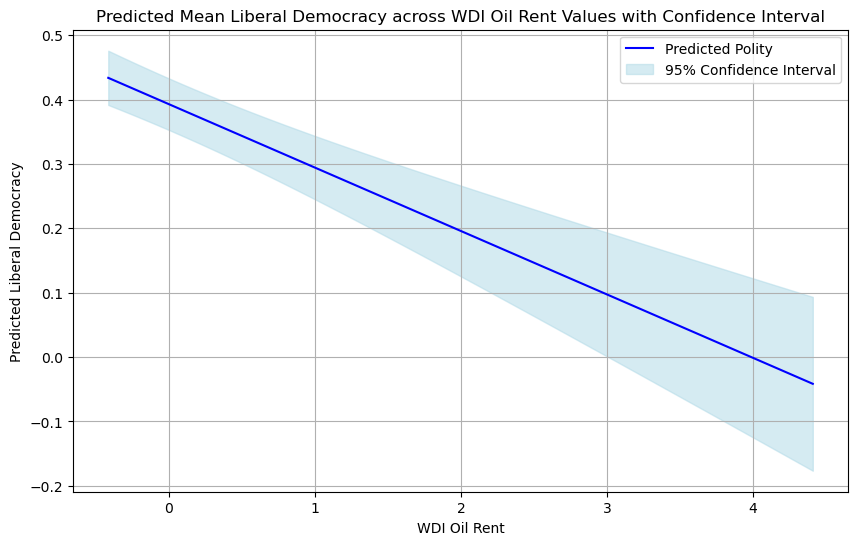

In [28]:
### Generate predictions across range of 'wdi_oilrent'

min_oilrent = df_scaled['wdi_oilrent'].min()
max_oilrent = df_scaled['wdi_oilrent'].max()
oilrent_values = np.linspace(min_oilrent, max_oilrent, 100)
mean_median_values = df_scaled.mean()
mean_median_values['cw'] = df_scaled['cw'].median()
mean_median_values['colonial'] = df_scaled['colonial'].median()

### Create a DataFrame for these values
prediction_df = pd.DataFrame({
    'wdi_oilrent': oilrent_values,
    'colonial': mean_median_values['colonial'],
    'cw': mean_median_values['cw'],
    'al_ethnic2000': mean_median_values['al_ethnic2000'],
    'al_religion2000': mean_median_values['al_religion2000'],
    'wdi_araland': mean_median_values['wdi_araland'],
    'wdi_trade': mean_median_values['wdi_trade'],
    'log_gdp': mean_median_values['log_gdp'],
    'log_pop': mean_median_values['log_pop']
})

### Predict 'polity' and obtain confidence intervals
predictions_with_ci = ols_model.get_prediction(prediction_df)
predictions_summary_frame = predictions_with_ci.summary_frame()
polity_predicted = predictions_summary_frame['mean']
ci_lower = predictions_summary_frame['mean_ci_lower']
ci_upper = predictions_summary_frame['mean_ci_upper']

### Plot
plt.figure(figsize=(10, 6))
plt.plot(oilrent_values, polity_predicted, label='Predicted Polity', color='blue')
plt.fill_between(oilrent_values, ci_lower, ci_upper, color='lightblue', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('WDI Oil Rent')
plt.ylabel('Predicted Liberal Democracy')
plt.title('Predicted Mean Liberal Democracy across WDI Oil Rent Values with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

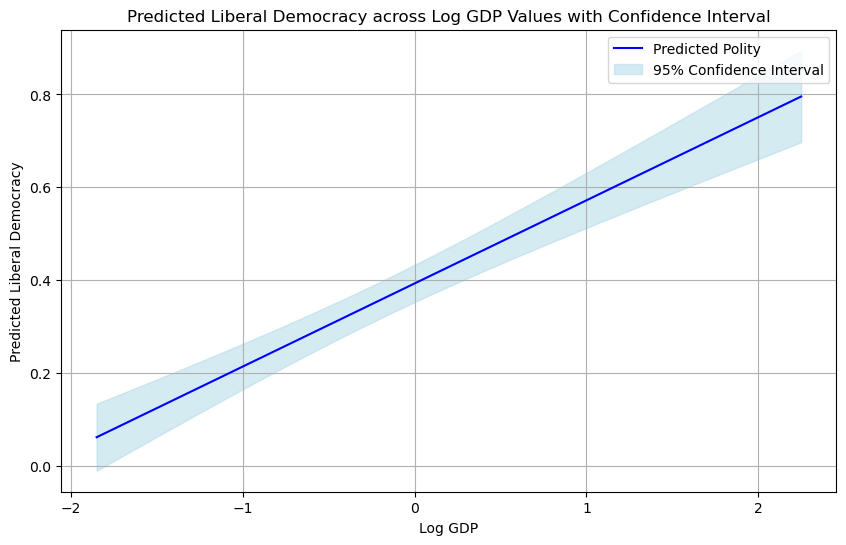

In [29]:
### Generate predictions across range of 'log_gdp'

min_log_gdp = df_scaled['log_gdp'].min()
max_log_gdp = df_scaled['log_gdp'].max()
log_gdp_values = np.linspace(min_log_gdp, max_log_gdp, 100)
mean_median_values = df_scaled.mean()
mean_median_values['cw'] = df_scaled['cw'].median()
mean_median_values['colonial'] = df_scaled['colonial'].median()


### Adjust DataFrame for prediction to vary 'log_gdp'
prediction_df_log_gdp = pd.DataFrame({
    'log_gdp': log_gdp_values,
    'wdi_oilrent': mean_median_values['wdi_oilrent'],
    'colonial': mean_median_values['colonial'],
    'cw': mean_median_values['cw'],
    'al_ethnic2000': mean_median_values['al_ethnic2000'],
    'al_religion2000': mean_median_values['al_religion2000'],
    'wdi_araland': mean_median_values['wdi_araland'],
    'wdi_trade': mean_median_values['wdi_trade'],
    'log_pop': mean_median_values['log_pop']
})

### Predict liberal democracy across range of 'log_gdp' and obtain confidence intervals
predictions_with_ci_log_gdp = ols_model.get_prediction(prediction_df_log_gdp)
predictions_summary_frame_log_gdp = predictions_with_ci_log_gdp.summary_frame()
polity_predicted_log_gdp = predictions_summary_frame_log_gdp['mean']
ci_lower_log_gdp = predictions_summary_frame_log_gdp['mean_ci_lower']
ci_upper_log_gdp = predictions_summary_frame_log_gdp['mean_ci_upper']

### Plotting results
plt.figure(figsize=(10, 6))
plt.plot(log_gdp_values, polity_predicted_log_gdp, label='Predicted Polity', color='blue')
plt.fill_between(log_gdp_values, ci_lower_log_gdp, ci_upper_log_gdp, color='lightblue', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Log GDP')
plt.ylabel('Predicted Liberal Democracy')
plt.title('Predicted Liberal Democracy across Log GDP Values with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

### Interactions 

Research Questions: 
1. Does having a colonial history prevent democratization? (transfer wealth from the colony to the colonizer?)
2. Do countries with colonial history and higher oil rent tend to be democratic?

In [30]:
### Define the formula
formula = """vdem_libdem~ wdi_oilrent*colonial + cw + al_ethnic2000+ al_religion2000 
+ wdi_araland + wdi_trade + log_gdp + log_pop"""

### Perform OLS regression
ols_model_inter = smf.ols(formula=formula, data=df_scaled).fit()

### Print the regression results
print(ols_model_inter.summary())

                            OLS Regression Results                            
Dep. Variable:            vdem_libdem   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     23.96
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           8.92e-26
Time:                        11:48:42   Log-Likelihood:                 56.666
No. Observations:                 151   AIC:                            -91.33
Df Residuals:                     140   BIC:                            -58.14
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4218 

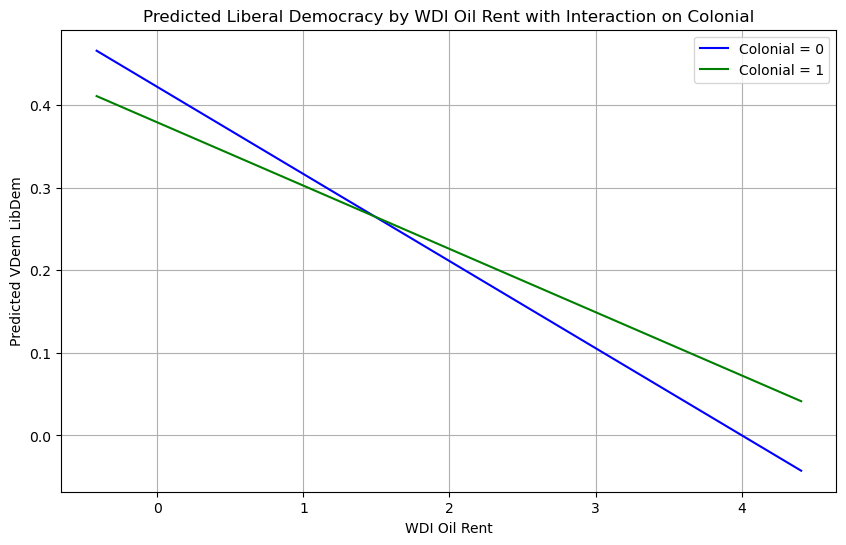

In [31]:
### Define range for 'wdi_oilrent'

min_oilrent = df_scaled['wdi_oilrent'].min()
max_oilrent = df_scaled['wdi_oilrent'].max()
oilrent_values = np.linspace(min_oilrent, max_oilrent, 100)

### Calculate mean or median for other predictors
mean_median_values = df_scaled.mean()
mean_median_values['cw'] = df_scaled['cw'].median()

### Create two DataFrames for prediction: one for colonial = 0 and one for colonial = 1
prediction_df_col0 = pd.DataFrame({
    'wdi_oilrent': oilrent_values,
    'colonial': 0,  
    'cw': mean_median_values['cw'],
    'al_ethnic2000': mean_median_values['al_ethnic2000'],
    'al_religion2000': mean_median_values['al_religion2000'],
    'wdi_araland': mean_median_values['wdi_araland'],
    'wdi_trade': mean_median_values['wdi_trade'],
    'log_gdp': mean_median_values['log_gdp'],
    'log_pop': mean_median_values['log_pop']
})

prediction_df_col1 = prediction_df_col0.copy()
prediction_df_col1['colonial'] = 1  




### Predict vdem_libdem for both colonial = 0 and colonial = 1 scenarios
vdem_libdem_pred_col0 = ols_model_inter.predict(prediction_df_col0)
vdem_libdem_pred_col1 = ols_model_inter.predict(prediction_df_col1)

### Plotting results for 'wdi_oilrent' with interaction term for 'colonial'
plt.figure(figsize=(10, 6))
plt.plot(oilrent_values, vdem_libdem_pred_col0, label='Colonial = 0', color='blue')
plt.plot(oilrent_values, vdem_libdem_pred_col1, label='Colonial = 1', color='green')
plt.xlabel('WDI Oil Rent')
plt.ylabel('Predicted VDem LibDem')
plt.title('Predicted Liberal Democracy by WDI Oil Rent with Interaction on Colonial')
plt.legend()
plt.grid(True)
plt.show()

## Generalized Linear Regression

0.262
0.915


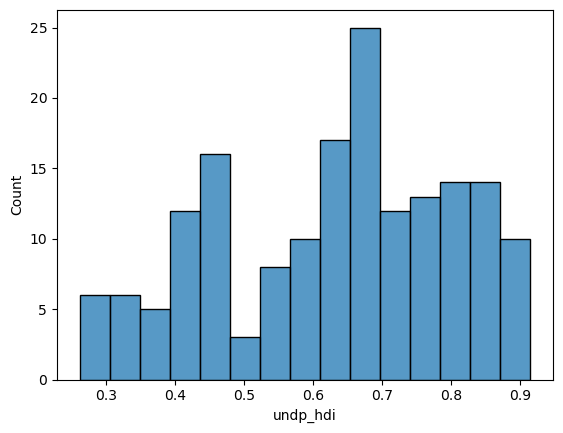

In [32]:
sns.histplot(x="undp_hdi", data = df_2000, bins=15)
print(df_2000["undp_hdi"].min())
print(df_2000["undp_hdi"].max())

In [33]:
### Formula for Gamma regression
formula = """undp_hdi~ colonial + wdi_oilrent + cw + al_ethnic2000 + al_religion2000 
+ wdi_araland + wdi_trade + log_gdp + log_pop"""

### Fit Gamma GLM
gamma_model = smf.glm(formula=formula, data=df_scaled, family=sm.families.Gamma()).fit()

### results
print(gamma_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               undp_hdi   No. Observations:                  153
Model:                            GLM   Df Residuals:                      143
Model Family:                   Gamma   Df Model:                            9
Link Function:           InversePower   Scale:                        0.023060
Method:                          IRLS   Log-Likelihood:                 145.01
Date:                Fri, 29 Mar 2024   Deviance:                       3.5507
Time:                        11:48:42   Pearson chi2:                     3.30
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9167
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6354      0.023     

/Users/namigabbasov/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


### Logistic Regression 

In [34]:
### Make a binary variable 
df_scaled['dem'] = (df_scaled['polity'] > 6).astype(int)

### Formula
formula = """dem ~ colonial + wdi_oilrent + cw + al_ethnic2000 + al_religion2000 
+ wdi_araland+ wdi_trade+log_gdp+log_pop"""

### Fitting model
logit = smf.logit(formula, data=df_scaled).fit()

### model summary
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.370011
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    dem   No. Observations:                  162
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            9
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.4485
Time:                        11:48:43   Log-Likelihood:                -59.942
converged:                       True   LL-Null:                       -108.70
Covariance Type:            nonrobust   LLR p-value:                 5.019e-17
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8523      0.326     -2.618      0.009      -1.490      -0.214
colonial      

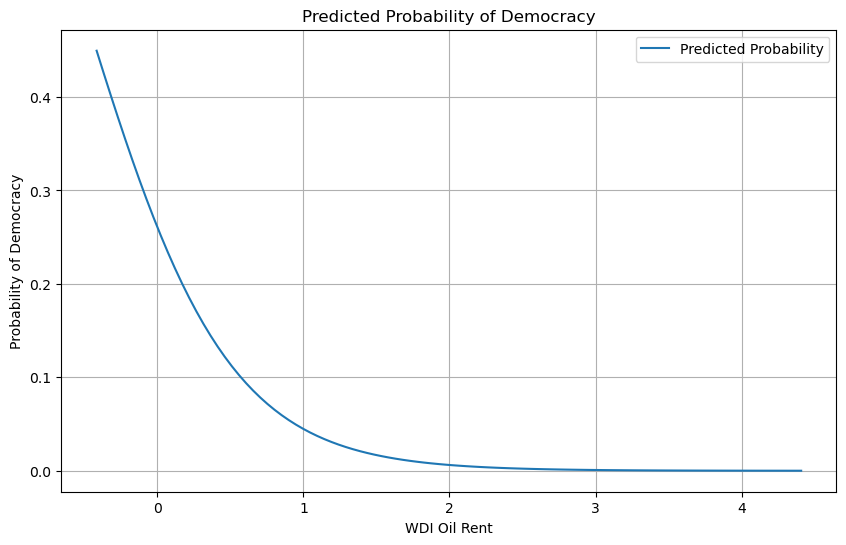

In [35]:
### New DataFrame for prediction

oilrent_values = np.linspace(df_scaled['wdi_oilrent'].min(), df_scaled['wdi_oilrent'].max(), 100)
data_for_prediction = pd.DataFrame({'wdi_oilrent': oilrent_values})
for var in ['colonial', 'cw', 'al_ethnic2000', 'al_religion2000', 'wdi_araland', 'wdi_trade', 'log_gdp', 'log_pop']:
    data_for_prediction[var] = df_scaled[var].mean()

### Predict probabilities
predicted_probs = logit.predict(data_for_prediction)

### Plot
plt.figure(figsize=(10, 6))
plt.plot(data_for_prediction['wdi_oilrent'], predicted_probs, label='Predicted Probability')
plt.xlabel('WDI Oil Rent')
plt.ylabel('Probability of Democracy')
plt.title('Predicted Probability of Democracy')
plt.legend()
plt.grid(True)
plt.show()

## Count Models 

In [36]:
### a different notebook will be uploaded



### Poisson Regression

In [37]:
### Generate a sample dataset

np.random.seed(0)        ### For reproducibility
n = 100                  ### Number of observations
df_P = pd.DataFrame({
    'x1': np.random.normal(0, 1, n),          ### Independent variable 1
    'x2': np.random.normal(5, 2, n),          ### Independent variable 2
    'country': np.random.choice(['CountryA', 'CountryB', 'CountryC'], n),  ### Country dummy
    'year': np.random.choice([2020, 2021, 2022], n)  # Year
})

### Generating count dependent variable with Poisson distribution. 
### lambda for Poisson distribution is exponential of linear combination of variables

df_P['lambda'] = np.exp(1.5 + 0.4*df_P['x1'] - 0.2*df_P['x2'])
df_P['count'] = np.random.poisson(df_P['lambda'])

### Prepare data for Poisson regression
X = df_P[['x1', 'x2']]  ### Independent variables
X = sm.add_constant(X)  ### Adds constant term to predictor
y = df_P['count']  ### Dependent variable

In [38]:
### Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

### model summary 
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  count   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -157.15
Date:                Fri, 29 Mar 2024   Deviance:                       101.22
Time:                        11:48:43   Pearson chi2:                     97.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4316
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2433      0.184      6.772      0.000       0.883       1.603
x1             0.4723      0.072      6.594      0.000       0.332       0.613
x2            -0.1437      0.036     -3.996      0.000      -0.214      -0.073
==============================================================================
"""

### Negative binomial 

## Fixed Effects Model

In [39]:
### a different notebook will be uploaded



## Survival Analysis 

In [40]:
### a different notebook will be uploaded



## Additional Resourses 

https://www.statsmodels.org/stable/user-guide.html- Regression and Linear Models, Time Series etc 
https://www.statsmodels.org/stable/graphics.html - primary graphics capabilities from statsmodels
https://www.statsmodels.org/stable/diagnostic.html - regression diagnostics
https://www.statsmodels.org/dev/examples/index.html - many general examples across various models
https://www.statsmodels.org/dev/example_formulas.html -  formula API examples
https://www.statsmodels.org/stable/example_formulas.html - fitting models using R-style formulas
https://www.statsmodels.org/devel/imputation.html - imputation
https://www.statsmodels.org/dev/generated/statsmodels.imputation.mice.MICE.html -  MICE imputation
